## Gridded data manipulation

In [1]:
import lenapy
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=xr.open_dataset('../../data/ecco.nc',engine='lenapyNetcdf')

Ocean mean temperature and salinity

In [7]:
data.lngeo.mean(['latitude','longitude','depth'],weights=['latitude','depth']).compute()

<xarray.Dataset> Size: 24B
Dimensions:  ()
Coordinates:
    time     datetime64[ns] 8B 2010-01-16T12:00:00
Data variables:
    PT       float64 8B 3.497
    psal     float64 8B 34.73

Mean zonal potential temperature

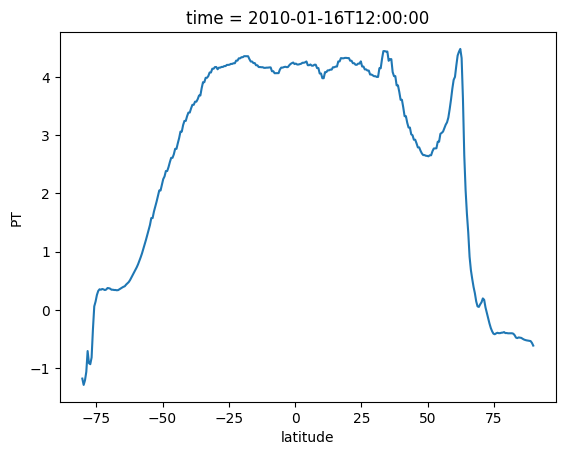

In [11]:
data.lngeo.mean(['longitude','depth'],weights=['depth']).PT.plot()

Depth of the 10°C isotherm - isosurface is applied on a Dataset

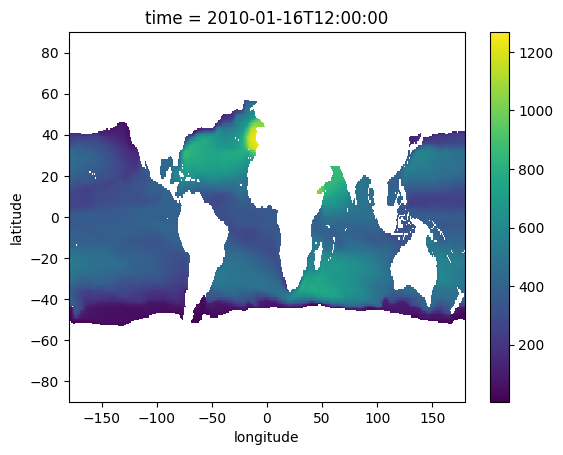

In [14]:
data.PT.lngeo.isosurface(10,'depth').plot()

Salinity at the depth of the 10°C isotherm - isosurface is applied to a DataArray

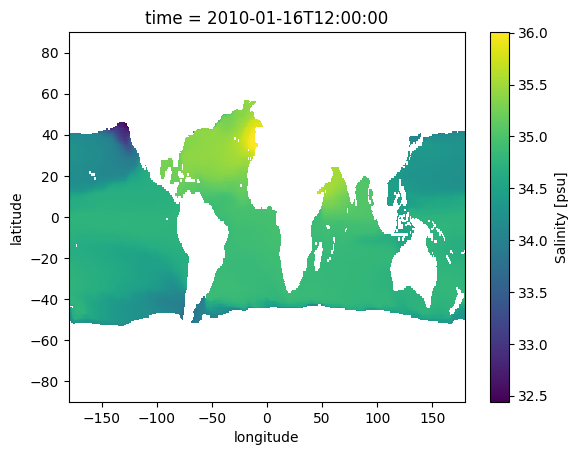

In [16]:
data.lngeo.isosurface(dict(PT=10),'depth').psal.plot()

Resampling

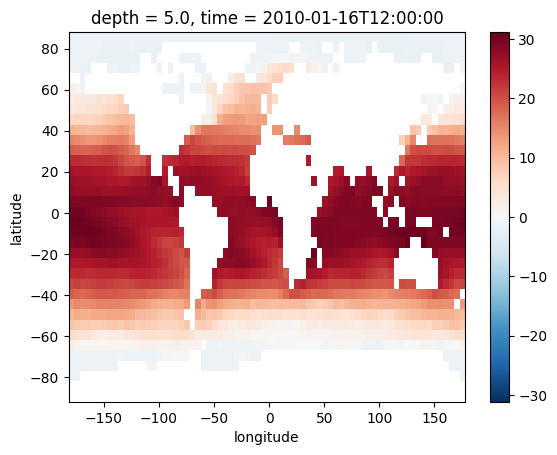

In [24]:
ds_out = xr.Dataset(
    {
        "latitude":(["latitude"],np.arange(-89.5,90,5.)),
        "longitude":(["longitude"],np.arange(-179.5,180,5.))
    }
)

reg=data.lngeo.regridder(ds_out,method="bilinear")
data.PT.isel(depth=0).lngeo.regrid(reg).plot()